## Bài tập lập trình môn CSDL
### Author: Bùi Thanh Thiện
### MSSV: 20214099






#### Bài tập 1: Viết chương trình mô phỏng phân bố Gauss

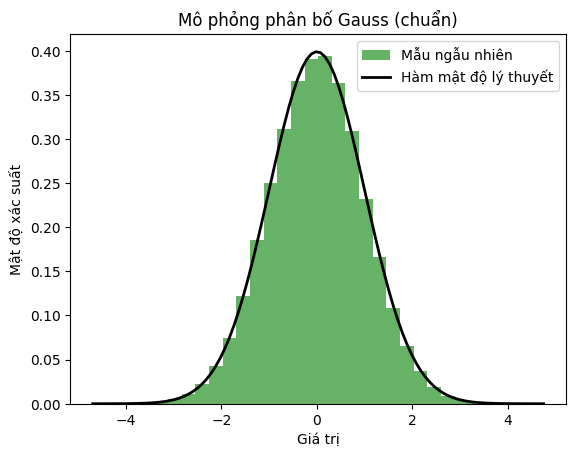

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Thông số phân bố ( input ) có thể thay đổi được
mean = 0        # Kỳ vọng
std_dev = 1     # Độ lệch chuẩn
num_samples = 100000  # Số lượng sample

# Sinh các mẫu ngâu nhiên từ phân bố chuẩn
samples = np.random.normal(mean, std_dev, num_samples)

# Vẽ biểu đồ histogram của mẫu ngẫu nhiên
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Mẫu ngẫu nhiên')

# Vẽ đường cong mật độ xác suất lý thuyết
xmin, xmax = plt.xlim()  # Lấy giới hạn trục x từ biểu đồ
x = np.linspace(xmin, xmax, 100)  # Tạo mảng giá trị x
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)  # Công thức mật độ xác suất chuẩn
plt.plot(x, pdf, 'k', linewidth=2, label='Hàm mật độ lý thuyết')

# === Hiển thị biểu đồ ===
plt.title('Mô phỏng phân bố Gauss (chuẩn)')
plt.xlabel('Giá trị')
plt.ylabel('Mật độ xác suất')
plt.legend()
plt.show()


#### Bài tập 2: Viết chương trình vẽ dao động đồ qua oscilloscope

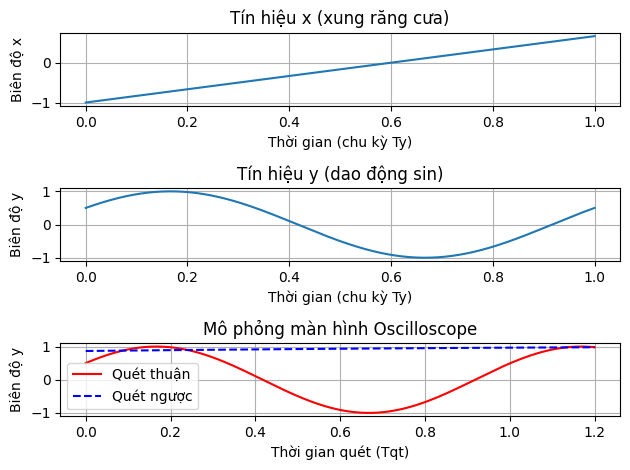

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# === Input parameters ===
k1 = 1.2    # Tỉ số Tqt/Ty
k2 = 0.05   # Tỉ số Tqn/Ty
phiy = np.pi / 6  # Pha ban đầu của y (radian)
n_periods = 1     # Số chu kỳ của y muốn mô phỏng

Ty = 1.0          # Chu kỳ chuẩn của y (có thể đặt là 1)
Tx = k1 + k2      # Chu kỳ tổng của x
total_time = n_periods * Ty  # Tổng thời gian mô phỏng đúng n chu kỳ y

# Tạo trục thời gian
dt = Ty / 500
t = np.arange(0, total_time + dt, dt)

# Tạo tín hiệu x (xung răng cưa: -1 -> 1 -> -1 ...)
x = np.zeros_like(t)
for i, ti in enumerate(t):
    t_in_cycle = ti % Tx
    if t_in_cycle < k1:
        x[i] = -1 + 2 * (t_in_cycle / k1)  # Tuyến tính từ -1 đến 1
    else:
        x[i] = -1  # Pha nghỉ

# Tạo tín hiệu y (sin)
y = np.sin(2 * np.pi * t / Ty + phiy)

# Vẽ tín hiệu x
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Tín hiệu x (xung răng cưa)')
plt.xlabel('Thời gian (chu kỳ Ty)')
plt.ylabel('Biên độ x')
plt.grid(True)

# Vẽ tín hiệu y
plt.subplot(3, 1, 2)
plt.plot(t, y)
plt.title('Tín hiệu y (dao động sin)')
plt.xlabel('Thời gian (chu kỳ Ty)')
plt.ylabel('Biên độ y')
plt.grid(True)

# Mô phỏng màn hình Oscilloscope
plt.subplot(3, 1, 3)
for p in range(n_periods): # Lặp qua từng chu kỳ
    # Quét thuận
    qt = np.arange(p * Ty, p * Ty + k1, dt) # Thời gian quét thuận
    u = np.linspace(0, k1, len(qt)) # Tạo trục thời gian quét
    yqt = np.sin(2 * np.pi * qt / Ty + phiy) # Tín hiệu y quét thuận
    plt.plot(u, yqt, 'r', label='Quét thuận' if p == 0 else "") # Vẽ tín hiệu quét thuận
    # Quét ngược
    qn = np.arange(p * Ty + k1 + k2, p * Ty + k1, -dt) # Thời gian quét ngược
    u_rev = np.linspace(0, k1, len(qn)) # Tạo trục thời gian quét ngược
    yqn = np.sin(2 * np.pi * qn / Ty + phiy) # Tín hiệu y quét ngược
    plt.plot(u_rev, yqn, 'b--', label='Quét ngược' if p == 0 else "") # Vẽ tín hiệu quét ngược
plt.title('Mô phỏng màn hình Oscilloscope')
plt.xlabel('Thời gian quét (Tqt)')
plt.ylabel('Biên độ y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Bài tập 3 : Viết chương trình mô phỏng Lissajous graph

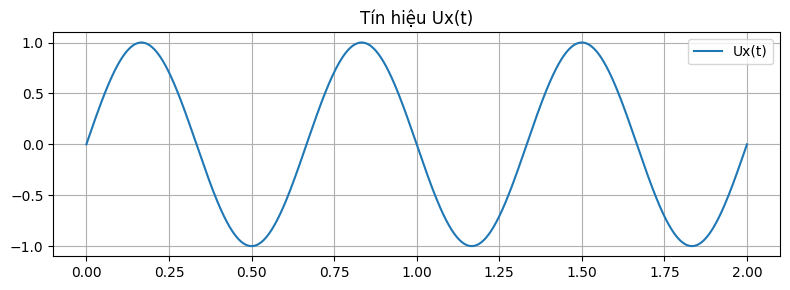

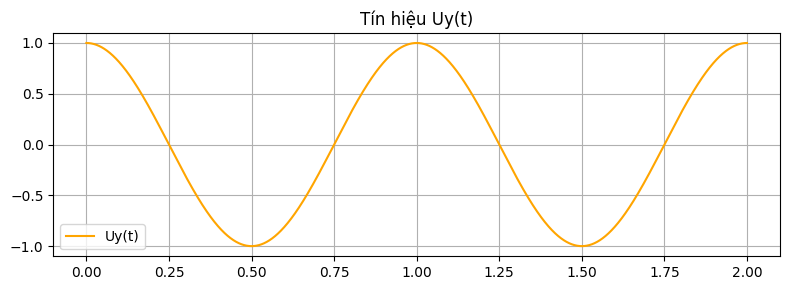

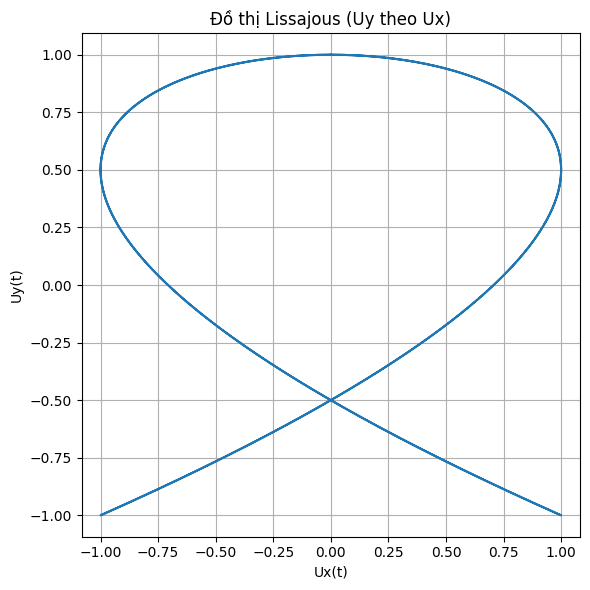

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Tham số đầu vào
U0 = 1
w2 = 2 * np.pi * 1  # Tần số góc w2 (ví dụ: 1 Hz)
w1 = 1.5 * w2  # ví dụ: 2w1 = 3w2 => w1 = 1.5w2
delta_phi = np.pi / 2  # Độ lệch pha

T = 2  # Thời gian mô phỏng (giây)
fs = 1000  # Tần số lấy mẫu (Hz)
t = np.linspace(0, T, int(T * fs))  # Trục thời gian

# Tạo tín hiệu Ux(t) và Uy(t)
Ux = U0 * np.sin(w1 * t)
Uy = U0 * np.sin(w2 * t + delta_phi)

# Vẽ Ux(t)
plt.figure(figsize=(8, 3)) # Kích thước hình vẽ
plt.plot(t, Ux, label='Ux(t)')
plt.title('Tín hiệu Ux(t)')
plt.grid(True) # Hiện Lưới
plt.legend() # Hiện chú thích
plt.tight_layout() # Căn chỉnh bố cục
plt.show()

# Vẽ Uy(t)
plt.figure(figsize=(8, 3))
plt.plot(t, Uy, label='Uy(t)', color='orange')
plt.title('Tín hiệu Uy(t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Vẽ đồ thị Lissajous (Uy theo Ux)
plt.figure(figsize=(6, 6))
plt.plot(Ux, Uy)
plt.title('Đồ thị Lissajous (Uy theo Ux)')
plt.xlabel('Ux(t)')
plt.ylabel('Uy(t)')
plt.axis('equal')
plt.grid(True)
plt.tight_layout() # Căn chỉnh bố cục
plt.show()